In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data(n_points=200, seed=42):
    np.random.seed(seed)

    # Class 0: points inside a circle with radius 5
    radius_0 = 5
    theta_0 = np.random.uniform(0, 2 * np.pi, n_points)
    r_0 = radius_0 * np.sqrt(np.random.uniform(0, 1, n_points))  # sqrt for uniform distribution
    x0 = r_0 * np.cos(theta_0)
    y0 = r_0 * np.sin(theta_0)
    class_0 = np.vstack((x0, y0)).T

    # Class 1: points in an annulus between radius 8 and 10
    inner_radius_1 = 8
    outer_radius_1 = 10
    theta_1 = np.random.uniform(0, 2 * np.pi, n_points)
    r_1 = np.sqrt(np.random.uniform(inner_radius_1**2, outer_radius_1**2, n_points))
    x1 = r_1 * np.cos(theta_1)
    y1 = r_1 * np.sin(theta_1)
    class_1 = np.vstack((x1, y1)).T

    return class_0, class_1

class_0, class_1 = generate_data()

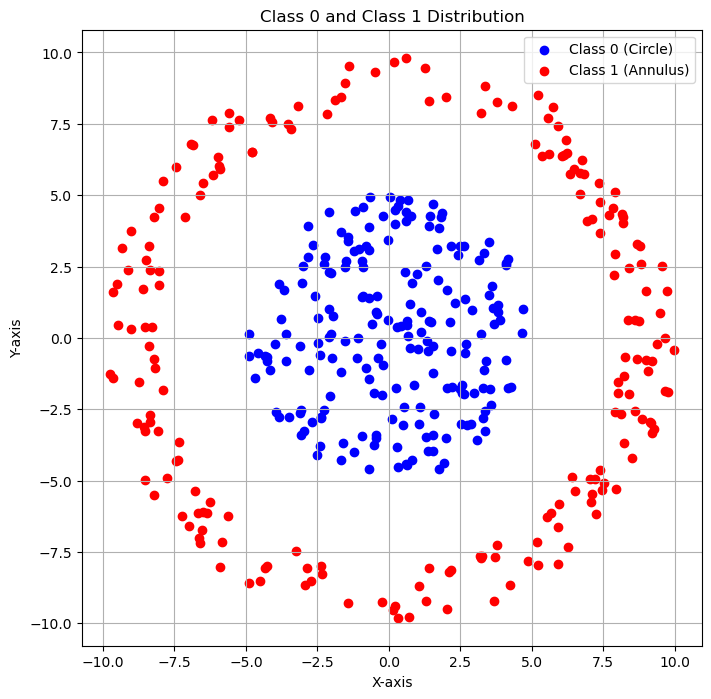

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Class 0 (Circle)')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1 (Annulus)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Class 0 and Class 1 Distribution')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

In [4]:
# Support Vector Machines (SVMs) with a Kernel Trick

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
# Combine the two classes into a single dataset with labels
X = np.vstack((class_0, class_1))
y = np.hstack((np.zeros(len(class_0)), np.ones(len(class_1)))).astype(int)

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create an SVM classifier with an RBF kernel
clf = SVC(kernel='rbf')

In [8]:
# Train the classifier
clf.fit(X_train, y_train)

SVC()

In [9]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [10]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [12]:
!pip install mlxtend

  Using cached mlxtend-0.23.3-py3-none-any.whl (1.4 MB)
     --------------------------------------- 11.0/11.0 MB 13.1 MB/s eta 0:00:00
     ------------------------------------- 301.8/301.8 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


In [13]:
from mlxtend.plotting import plot_decision_regions

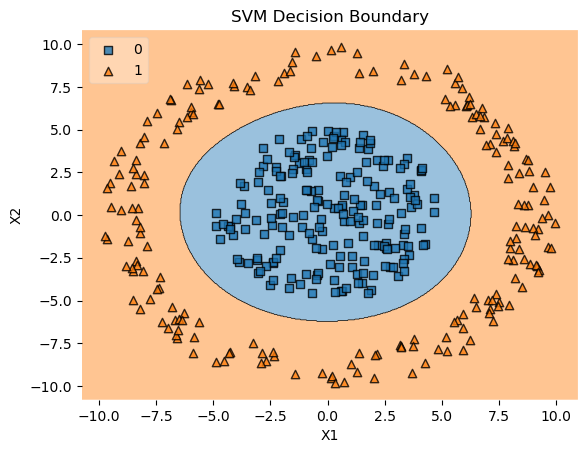

In [14]:
# Plot the decision regions
plot_decision_regions(X, y, clf=clf, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Decision Boundary')
plt.show()

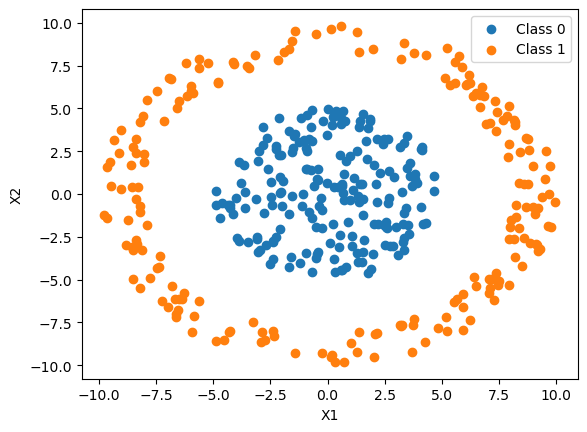

In [15]:
plt.scatter(class_0[:, 0], class_0[:, 1], label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()